In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_nomination = pd.read_csv('./csv/oscar_all_nominations.csv', skipinitialspace=True)

In [3]:
df_nomination

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson
...,...,...,...,...
11053,2017,SCIENTIFIC AND TECHNICAL AWARD (Scientific and...,True,"To LEONARD CHAPMAN for the overall concept, de..."
11054,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To JASON SMITH and JEFF WHITE for the original...
11055,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,"To JOE MANCEWICZ, MATT DERKSEN and HANS RIJPKE..."
11056,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To ALEX POWELL for his contribution to the des...


nombre de catégories par années

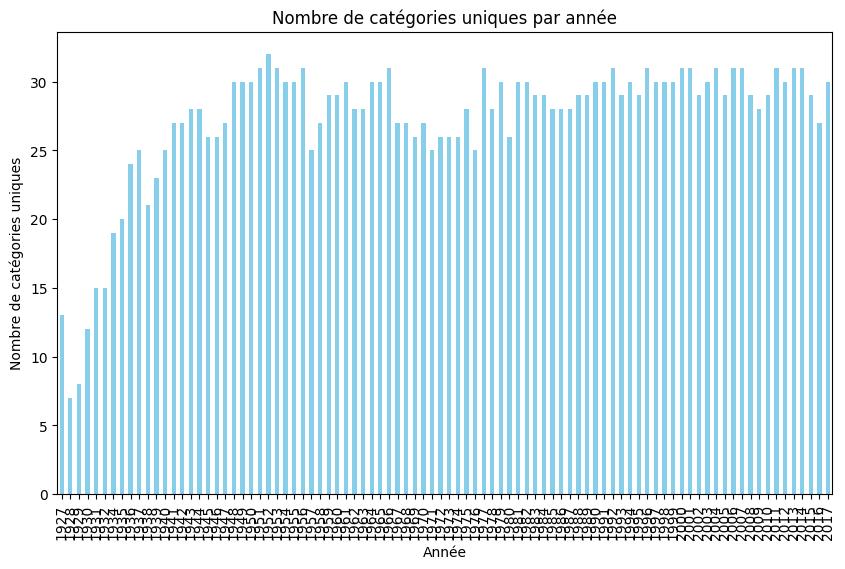

In [4]:
# Compter le nombre de catégories uniques par année
cat_by_year = df_nomination.groupby('year')['category'].nunique()

# Tracer un graphique à barres
cat_by_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Nombre de catégories uniques par année')
plt.xlabel('Année')
plt.ylabel('Nombre de catégories uniques')
plt.show()


In [5]:
nom_by_year = df_nomination.groupby(['year', 'category']).size().reset_index(name='nominees_count')
nom_by_year

,year,category,nominees_count
0,1927,ACTOR,2
1,1927,ACTRESS,3
2,1927,ART DIRECTION,3
3,1927,CINEMATOGRAPHY,3
4,1927,DIRECTING (Comedy Picture),2
...,...,...,...
2449,2017,SOUND MIXING,5
2450,2017,SPECIAL AWARD,1
2451,2017,VISUAL EFFECTS,5
2452,2017,WRITING (Adapted Screenplay),5


In [6]:
acting_fields = ['ACTOR', 'ACTRESS', 'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE']

def filter_by_category(df_nomination, values):
    return df_nomination[df_nomination['category'].isin(values)]

filter_by_category(df_nomination, acting_fields)

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson
...,...,...,...,...
10935,2017,ACTRESS IN A SUPPORTING ROLE,False,Mary J. Blige
10936,2017,ACTRESS IN A SUPPORTING ROLE,True,Allison Janney
10937,2017,ACTRESS IN A SUPPORTING ROLE,False,Lesley Manville
10938,2017,ACTRESS IN A SUPPORTING ROLE,False,Laurie Metcalf


In [8]:
df_age = pd.read_csv('./csv/oscar_age_processed.csv')

In [9]:
merged_df = pd.merge(df_nomination, df_age, left_on='entity', right_on='name', how='left')
merged_df

,year_x,category,winner,entity,year_y,age,name,movie,gender
0,1927,ACTOR,False,Richard Barthelmess,NaN,NaN,NaN,NaN,NaN
1,1927,ACTOR,True,Emil Jannings,1927.0,44.0,Emil Jannings,"The Last Command, The Way of All Flesh",m
2,1927,ACTRESS,False,Louise Dresser,NaN,NaN,NaN,NaN,NaN
3,1927,ACTRESS,True,Janet Gaynor,1927.0,22.0,Janet Gaynor,"Seventh Heaven, Street Angel and Sunrise: A So...",f
4,1927,ACTRESS,False,Gloria Swanson,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11243,2017,SCIENTIFIC AND TECHNICAL AWARD (Scientific and...,True,"To LEONARD CHAPMAN for the overall concept, de...",NaN,NaN,NaN,NaN,NaN
11244,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To JASON SMITH and JEFF WHITE for the original...,NaN,NaN,NaN,NaN,NaN
11245,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,"To JOE MANCEWICZ, MATT DERKSEN and HANS RIJPKE...",NaN,NaN,NaN,NaN,NaN
11246,2017,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,True,To ALEX POWELL for his contribution to the des...,NaN,NaN,NaN,NaN,NaN
